Autonomo 4
Nombre: Ana Cristina Lima
Grupo: A

Instrucciones:
Escenario: Clasificación de Pingüinos Antárticos
Un instituto de biología necesita un clasificador que, a partir de
mediciones morfológicas de pingüinos, prediga su especie (Adelie,
Chinstrap o Gentoo).


Para leer el archivo Y PREPARACION DE LOS DATOS

In [ ]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('pinguins.csv')

# Para ver las primeras filas
print(df.head())

# Mostrar nombres de columnas
print("\nColumnas disponibles:")
print(df.columns)

# Verificar si hay datos nulos
print("\nValores faltantes por columna:")
print(df.isnull().sum())


                               Species  Culmen Length (mm)  Culmen Depth (mm)  \
0  Adelie Penguin (Pygoscelis adeliae)                39.5               17.4   
1  Adelie Penguin (Pygoscelis adeliae)                40.3               18.0   
2  Adelie Penguin (Pygoscelis adeliae)                36.7               19.3   
3  Adelie Penguin (Pygoscelis adeliae)                39.3               20.6   
4  Adelie Penguin (Pygoscelis adeliae)                38.9               17.8   

   Flipper Length (mm)  Body Mass (g)  
0                186.0         3800.0  
1                195.0         3250.0  
2                193.0         3450.0  
3                190.0         3650.0  
4                181.0         3625.0  

Columnas disponibles:
Index(['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)'],
      dtype='object')

Valores faltantes por columna:
Species                0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Leng


Requerimiento: Encapsulamiento --> Atributos privados, getters y setters donde sea
necesario.
ABSTRACCION CLASE BASE

In [ ]:
from abc import ABC, abstractmethod

class KNNBase(ABC):
    def __init__(self, k):
        self._k = k  # Aqui se ocupa el Encapsulamiento

    @abstractmethod
    def entrenar(self, datos, etiquetas):
        pass

    @abstractmethod
    def predecir(self, muestra):
        pass

    def get_k(self):
        return self._k

    def set_k(self, nuevo_k):
        self._k = nuevo_k


HERENCIA Y POLIMORFISMO--> CREAR LA CLASE KNNCLASIFIER QUE HEREDA DE KNNBASE

In [11]:
import numpy as np
from collections import Counter

class KNNClassifier(KNNBase):
    def __init__(self, k):
        super().__init__(k)
        self._X_train = None
        self._y_train = None

    def entrenar(self, datos, etiquetas):
        self._X_train = datos
        self._y_train = etiquetas

    def predecir(self, muestra):
        distancias = np.linalg.norm(self._X_train - muestra, axis=1)
        indices = np.argsort(distancias)[:self._k]
        etiquetas_vecinas = self._y_train[indices]
        return Counter(etiquetas_vecinas).most_common(1)[0][0]


REQUERIMIENTO: SOBRECARGA DE OPERADORES
Se usa:
__eq__ Dos ejemplares son iguales si tienen exactamente las mismas medidas
__add__ Para combinar dos listas de ejemplares en un unico conjunto

In [ ]:
class Ejemplar:
    def __init__(self, medidas, especie):
        self._medidas = medidas  
        self._especie = especie  
        
    def get_medidas(self):
        return self._medidas

    def get_especie(self):
        return self._especie

    def __eq__(self, otro):
        return np.array_equal(self._medidas, otro.get_medidas())

    def __add__(self, otro):
        return [
            Ejemplar(e.get_medidas(), e.get_especie())
            for e in (self, otro)
        ]


PRUEBA
El modelo se entrena con todos los datos y se realiza una predicción sobre un nuevo ejemplar. Se compara la etiqueta real con la predicha. Esto demuestra que el clasificador implementado cumple con su objetivo.

In [ ]:
# Crear una instancia del clasificador con k=3
modelo = KNNClassifier(k=3)

# Entrenar el modelo con todos los datos
modelo.entrenar(X, y)

# Seleccionar una muestra para predecir 
nueva_muestra = X[0] 

# Mostrar la muestra
print("Medidas del ejemplar:", nueva_muestra)

# Predecir la especie
prediccion = modelo.predecir(nueva_muestra)
print("Especie predicha:", prediccion)

# Mostrar la verdadera etiqueta
print("Especie real:", y[0])  


Medidas del ejemplar: [  39.5   17.4  186.  3800. ]
Especie predicha: Adelie Penguin (Pygoscelis adeliae)
Especie real: Adelie Penguin (Pygoscelis adeliae)


2. IMPLEMENTACION MINIMA EXIGIDA

In [27]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

class KNNClassifier:
    def __init__(self, k=3):
        self._k = k
        self._X_train = None
        self._y_train = None

    def fit(self, X, y):
        self._X_train = X
        self._y_train = y

    def distance(self, p1, p2):
        return np.linalg.norm(p1 - p2)

    def predict(self, X_new, k=None):
        k = k if k else self._k
        predicciones = []

        for muestra in X_new:
            distancias = [self.distance(muestra, x_ent) for x_ent in self._X_train]
            indices = np.argsort(distancias)[:k]
            etiquetas_vecinas = self._y_train[indices]
            especie_predicha = Counter(etiquetas_vecinas).most_common(1)[0][0]
            predicciones.append(especie_predicha)

        return predicciones

    def __repr__(self):
        return f"KNNClassifier(k={self._k}) con {len(self._X_train)} ejemplos entrenados"

    def plot_neighbors(self, x_new, k):
        distancias = [self.distance(x_new, x) for x in self._X_train]
        indices = np.argsort(distancias)[:k]

        vecinos = self._X_train[indices]
        etiquetas_vecinos = self._y_train[indices]

        # Proyección PCA
        X_total = np.vstack([self._X_train, x_new])
        pca = PCA(n_components=2)
        X_reducido = pca.fit_transform(X_total)

        X_train_2D = X_reducido[:-1]
        x_new_2D = X_reducido[-1]
        vecinos_2D = X_train_2D[indices]

        # Graficar
        plt.figure(figsize=(8, 6))
        for especie in np.unique(self._y_train):
            idx = self._y_train == especie
            plt.scatter(X_train_2D[idx, 0], X_train_2D[idx, 1], label=especie, alpha=0.5)

        plt.scatter(vecinos_2D[:, 0], vecinos_2D[:, 1],
                    edgecolor='black', facecolor='none',
                    linewidths=2, s=120, label=f'{k} vecinos')

        plt.scatter(x_new_2D[0], x_new_2D[1], color='red', marker='X', s=200, label='Ejemplar nuevo')

        plt.title(f'Vecinos más cercanos (k={k}) en 2D con PCA')
        plt.xlabel('Componente principal 1')
        plt.ylabel('Componente principal 2')
        plt.legend()
        plt.grid(True)
        plt.show()


Prueba la clase con tres valores de k (ej.: 1, 3 y 5) y muestra las
predicciones resultantes en pantalla o en una tabla.
En mi caso voy a ocupar 2,4 y 6


In [ ]:
# Para crear modelo
modelo = KNNClassifier()

# Para entrenar el modelo
modelo.fit(X, y)

# Seleccionar 5 muestras de prueba
muestras_prueba = X[:5]
etiquetas_reales = y[:5]

# Evaluar con distintos valores de k, en este caso con 2, 4 y 6
for k in [2, 4, 6]:
    print(f"\n🔍 Predicciones con k = {k}")
    predicciones = modelo.predict(muestras_prueba, k)
    for i in range(len(muestras_prueba)):
        print(f"Muestra {i+1}: Real = {etiquetas_reales[i]} | Predicha = {predicciones[i]}")



🔍 Predicciones con k = 2
Muestra 1: Real = Adelie Penguin (Pygoscelis adeliae) | Predicha = Adelie Penguin (Pygoscelis adeliae)
Muestra 2: Real = Adelie Penguin (Pygoscelis adeliae) | Predicha = Adelie Penguin (Pygoscelis adeliae)
Muestra 3: Real = Adelie Penguin (Pygoscelis adeliae) | Predicha = Adelie Penguin (Pygoscelis adeliae)
Muestra 4: Real = Adelie Penguin (Pygoscelis adeliae) | Predicha = Adelie Penguin (Pygoscelis adeliae)
Muestra 5: Real = Adelie Penguin (Pygoscelis adeliae) | Predicha = Adelie Penguin (Pygoscelis adeliae)

🔍 Predicciones con k = 4
Muestra 1: Real = Adelie Penguin (Pygoscelis adeliae) | Predicha = Adelie Penguin (Pygoscelis adeliae)
Muestra 2: Real = Adelie Penguin (Pygoscelis adeliae) | Predicha = Adelie Penguin (Pygoscelis adeliae)
Muestra 3: Real = Adelie Penguin (Pygoscelis adeliae) | Predicha = Adelie Penguin (Pygoscelis adeliae)
Muestra 4: Real = Adelie Penguin (Pygoscelis adeliae) | Predicha = Adelie Penguin (Pygoscelis adeliae)
Muestra 5: Real = Ade

RETO
Reto adicional (1 – 2 pto. extra) (Parcial)
Implementa un método plot_neighbors(x_new, k) que, para un ejemplar
nuevo, grafique los k vecinos más cercanos junto con su especie en un
plano 2D (tras proyección PCA).


In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Debo copiar el metodo plot_neigbors dentro de la clase KNNClassifier. Esto va a encontrar los K vecinos mas cercanos. Y se utiliza las PCA que son analisis de componentes principales, que convertir los datos de las 4 dimensiones a 2 dimensiones para el grafico.

In [ ]:
def plot_neighbors(self, x_new, k):
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt

    distancias = [self.distance(x_new, x) for x in self._X_train]
    indices = np.argsort(distancias)[:k]
    
    vecinos = self._X_train[indices]
    etiquetas_vecinos = self._y_train[indices]

    # Combinar el conjunto de entrenamiento con la muestra nueva
    X_total = np.vstack([self._X_train, x_new])
    pca = PCA(n_components=2)
    X_reducido = pca.fit_transform(X_total)

    X_train_2D = X_reducido[:-1]
    x_new_2D = X_reducido[-1]
    vecinos_2D = X_train_2D[indices]

    # Para Graficar
    plt.figure(figsize=(8, 6))
    for especie in np.unique(self._y_train):
        idx = self._y_train == especie
        plt.scatter(X_train_2D[idx, 0], X_train_2D[idx, 1], label=especie, alpha=0.5)

    plt.scatter(vecinos_2D[:, 0], vecinos_2D[:, 1],
                edgecolor='black', facecolor='none',
                linewidths=2, s=120, label=f'{k} vecinos')

    plt.scatter(x_new_2D[0], x_new_2D[1], color='red', marker='X', s=200, label='Ejemplar nuevo')

    plt.title(f'Vecinos más cercanos (k={k}) en 2D con PCA')
    plt.xlabel('Componente principal 1')
    plt.ylabel('Componente principal 2')
    plt.legend()
    plt.grid(True)
    plt.show()


In [31]:
modelo = KNNClassifier()
modelo.fit(X, y)

PRUEBA PARA EL GRAFICO

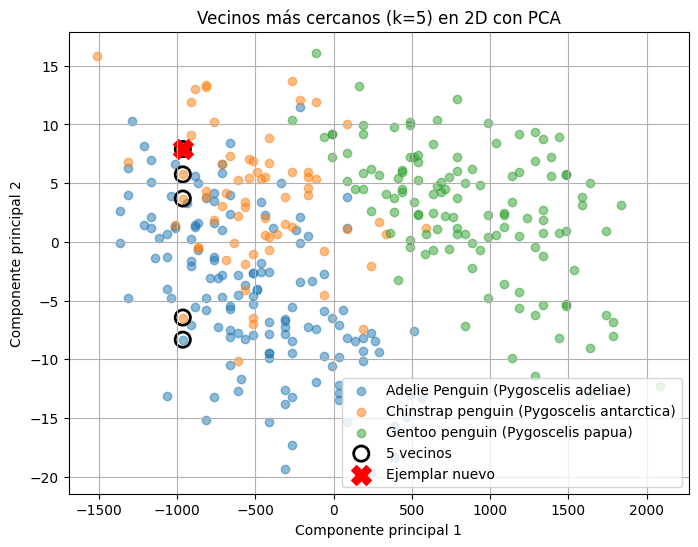

In [33]:
# Tomar un ejemplar de prueba 
x_nuevo = X[1]

# Graficar con k = 5
modelo.plot_neighbors(x_nuevo, k=5)


COLOR DE LAS ESPECIES:
- Azul: ADELIE
- Naranja: Chinstrap
- Verde:Gento
- Rojo: Nuevo ejemplar
- Negro: Vecios mas cercanos del ejemplar k que estamos evaluando

La gráfica muestra cómo el clasificador KNN encuentra los `k` vecinos más cercanos a un nuevo ejemplar , usando una proyección a 2 dimensiones (PCA). Los vecinos están resaltados con círculos negros y las especies están diferenciadas por colores. 